<a href="https://colab.research.google.com/github/fernandapilat/bootcamp-data-analytics/blob/master/Apresenta%C3%A7%C3%A3o_do_Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Squad Sarah Gilbert**

Integrantes:
- Fernanda Pilat.
- Thaís Faustino
- Karina Cunha
- Izabelle Nunes
- Luene Pizzi
- Priscila Mendes
- Anna Beatriz M. Vercesi
- Joannyta Reis


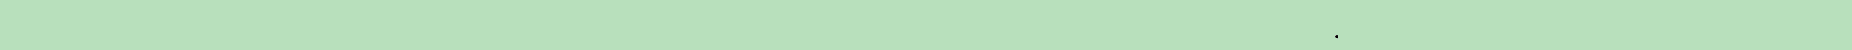

# **Resolução do exercício**

## **Desafio 4 - Futebol**

**Definição do problema:** Dado que você está trabalhando numa emissora de televisão, o narrador precisa informar o jogo com o maior número de gols na história da Bundesliga (Campeonato Alemão). Você precisa fazer uma busca em todos os jogos da história deste campeonato e verificar qual jogo é esse e passar a informação ao narrador, para posteriormente, o narrador informar aos telespectadores.

1. Verificar os jogos com maior quantidade de gols na história da Bundesliga

2. Informar a data, os times participantes e o placar do jogo

**Código do dataset:** Bundesliga

**Dicas:**

- Criar uma nova variável "TotalGols" com o total de gols da 
partida;
- Use o método.max()

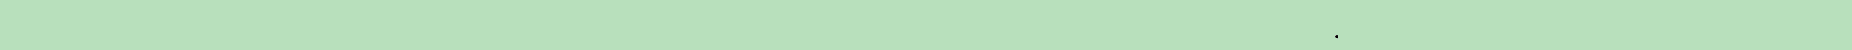
### **1.** Carregar bibliotecas e pacotes





**Importação da biblioteca Pydataset**

In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=e62aaa4b21ae298de30f757f7ce4114529735258950a482fe50aed7c1c12d4e9
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


**Importação de pacotes**

In [ ]:
from pydataset import data
import pandas as pd

initiated datasets repo at: /root/.pydataset/


**Importação do dataset**

* O primeiro passo é carregar o dataframe do campeonato Bundesliga através da função `data()`.
* Nesse momento, atribuimos o dataframe ao objeto df_fut.

In [ ]:
df_fut = data('Bundesliga')
df_fut.head(2)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date
1,Werder Bremen,Borussia Dortmund,3,2,1,1963,1963-08-24 09:30:00
2,Hertha BSC Berlin,1. FC Nuernberg,1,1,1,1963,1963-08-24 09:30:00


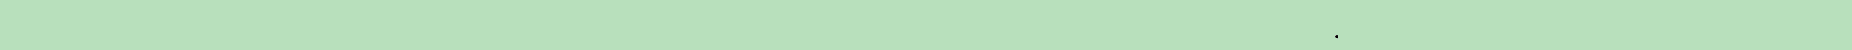

### **2.** Verificar os jogos com maior quantidade de gols na história da Bundesliga





**Criação da váriavel *TotalGols***
* **Passo 1:** nesta etapa optamos por criar uma nova coluna com a soma das variáveis `AwayTeam` e `HomeGoals`.


In [ ]:
#Passo 1
df_fut['TotalGols'] = df_fut['HomeGoals'] + df_fut['AwayGoals']
df_fut.head(2)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,TotalGols
1,Werder Bremen,Borussia Dortmund,3,2,1,1963,1963-08-24 09:30:00,5
2,Hertha BSC Berlin,1. FC Nuernberg,1,1,1,1963,1963-08-24 09:30:00,2


💻 Outra forma de fazer é utilizando o método `.join()`
```
TotalGols = df_fut['HomeGoals'] + df_fut['AwayGoals]
TotalGols = pd.Series(TotalGols, name='TotalGoals') # importante para nomear a coluna a ser inserida no DataFrame
df_fut = df_fut.join(TotalGols)
```



**Explorar o dataframe para descobrir a maior quantidade de gols**

* **Passo 2:** utilizamos a função `value_counts` na coluna TotalGols foi possível identificar que o maior número de gols no campeonato Bundesliga foi **12** e que esse placar ocorreu em **5** jogos.
* **Passo 3:** após classificamos o dataframe pela coluna TotalGols com o intuito de localizar o id dos cinco primeiros jogos. Nessa fase, utilizamos a função `sort_values`.

In [ ]:
#Passo 2
df_fut['TotalGols'].value_counts(ascending = True)

12       5
11      10
10      24
9       47
8      148
7      367
6      855
0      914
5     1379
1     1723
4     2531
3     2812
2     3203
Name: TotalGols, dtype: int64

In [ ]:
#Passo 3
df_fut.sort_values(by='TotalGols', ascending=False)

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,TotalGols
4457,Borussia Moenchengladbach,Borussia Dortmund,12,0,34,1977,1978-04-29 09:30:00,12
4052,1. FC Koeln,Tennis Borussia Berlin,8,4,23,1976,1977-02-26 09:30:00,12
2456,Bayern Muenchen,Borussia Dortmund,11,1,16,1971,1971-11-27 09:30:00,12
81,Borussia Dortmund,1. FC Kaiserslautern,9,3,11,1963,1963-11-16 09:30:00,12
5788,Borussia Dortmund,Arminia Bielefeld,11,1,12,1982,1982-11-06 09:30:00,12
...,...,...,...,...,...,...,...,...
10878,VfB Stuttgart,1. FC Nuernberg,0,0,26,1998,1999-04-13 13:30:00,0
10880,Werder Bremen,Hamburger SV,0,0,26,1998,1999-04-13 14:00:00,0
7562,Borussia Dortmund,Borussia Moenchengladbach,0,0,5,1988,1988-08-27 09:30:00,0
12974,VfB Stuttgart,Werder Bremen,0,0,20,2005,2006-02-08 14:00:00,0


💻 Outra forma seria usando o `.max()`:
```
df_fut['TotalGols'].max() # retorna o valor máximo da coluna TotalGols
```





**Filtro das informações dos jogos com mais gols**

* **Passo 4:** nesta fase, optamos por utilizar a função `loc[]` para filtrar os cinco jogos com maior número de gols e criei um novo dataframe com todas as informações. Bem como, utilizamos o método `reset_index` para remover o antigo índice, o objetivo é facilitar o `loc[]` para o print que informa ao locutor todos os jogos.



In [ ]:
#Passo 4
df_fut_top5 = df_fut.loc[[4457, 4052, 2456, 81, 5788]]
df_fut_top5.reset_index(drop=True, inplace=True)
df_fut_top5.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,TotalGols
0,Borussia Moenchengladbach,Borussia Dortmund,12,0,34,1977,1978-04-29 09:30:00,12
1,1. FC Koeln,Tennis Borussia Berlin,8,4,23,1976,1977-02-26 09:30:00,12
2,Bayern Muenchen,Borussia Dortmund,11,1,16,1971,1971-11-27 09:30:00,12
3,Borussia Dortmund,1. FC Kaiserslautern,9,3,11,1963,1963-11-16 09:30:00,12
4,Borussia Dortmund,Arminia Bielefeld,11,1,12,1982,1982-11-06 09:30:00,12


In [ ]:
df_fut_top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HomeTeam   5 non-null      object
 1   AwayTeam   5 non-null      object
 2   HomeGoals  5 non-null      int64 
 3   AwayGoals  5 non-null      int64 
 4   Round      5 non-null      int64 
 5   Year       5 non-null      int64 
 6   Date       5 non-null      object
 7   TotalGols  5 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 448.0+ bytes


💻 Também dá para fazer usando o *filtro* de jogos com número total de gols igual a 12
```
df[df['TotalGoals'] == 12] # filtra apenas as linhas onde TotalGols é igual a 12.
```



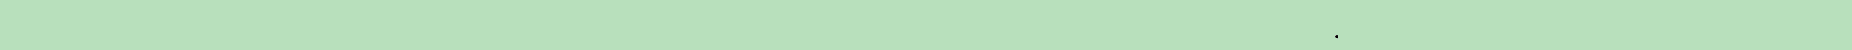

### **3.** Informar a data, os times participantes e o placar dos jogos


 **Print das informações para o jornalista**

* **Passo 5:** primeiro fizemos a alteração do formato da data para remover as horas e deixá-la mais no formato brasileiro. Utilizamos a função `pd.DatetimeIndex` e `strftime('%d/%m/%Y')`.
* **Passo 6:** usamos a função loc[] buscando diretamente no dataframe as infos.

* **Passo 7:** por último, utilizamos a função print para informar o jogo com maior número de gols.



In [ ]:
#Passo 6
df_fut_top5['Date'] = pd.DatetimeIndex(df_fut_top5['Date']).strftime('%d/%m/%Y')
df_fut_top5.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,TotalGols
0,Borussia Moenchengladbach,Borussia Dortmund,12,0,34,1977,29/04/1978,12
1,1. FC Koeln,Tennis Borussia Berlin,8,4,23,1976,26/02/1977,12
2,Bayern Muenchen,Borussia Dortmund,11,1,16,1971,27/11/1971,12
3,Borussia Dortmund,1. FC Kaiserslautern,9,3,11,1963,16/11/1963,12
4,Borussia Dortmund,Arminia Bielefeld,11,1,12,1982,06/11/1982,12


In [ ]:
df_fut_top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   HomeTeam   5 non-null      object        
 1   AwayTeam   5 non-null      object        
 2   HomeGoals  5 non-null      int64         
 3   AwayGoals  5 non-null      int64         
 4   Round      5 non-null      int64         
 5   Year       5 non-null      int64         
 6   Date       5 non-null      datetime64[ns]
 7   TotalGols  5 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 448.0+ bytes


In [ ]:
print('A maior quantidade de gols da história da Bundesliga foram 12 gols em uma partida. Nos seguintes jogos:')
print()
for indice in range(5):
  contagem = str(indice + 1)
  print(contagem + 'º ' + df_fut_top5.loc[indice,'HomeTeam'] +' vs ' + df_fut_top5.loc[indice,'AwayTeam'] +', no dia ' + df_fut_top5.loc[indice,'Date']
        + ', com o placar '+ str(df_fut_top5.loc[indice,'HomeGoals'])+ ' a ' + str(df_fut_top5.loc[indice,'AwayGoals']))
       


A maior quantidade de gols da história da Bundesliga foram 12 gols em uma partida. Nos seguintes jogos:

1º Borussia Moenchengladbach vs Borussia Dortmund, no dia 29/04/1978, com o placar 12 a 0
2º 1. FC Koeln vs Tennis Borussia Berlin, no dia 26/02/1977, com o placar 8 a 4
3º Bayern Muenchen vs Borussia Dortmund, no dia 27/11/1971, com o placar 11 a 1
4º Borussia Dortmund vs 1. FC Kaiserslautern, no dia 16/11/1963, com o placar 9 a 3
5º Borussia Dortmund vs Arminia Bielefeld, no dia 06/11/1982, com o placar 11 a 1


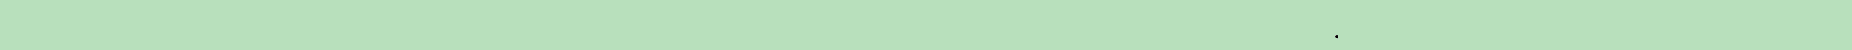
# **Organização do squad**

**2.** Explicar como a squad se organizou:
- Criamos um Google Colab com todos exercícios. 
- Cada uma do time clonou o Colab e tentou resolver individualmente.
- Fizemos uma reunião específica para o desafio 4.
- Duas integrantes foram em mentorias para tentar resolver o exercício mais hard de todos os tempos, mais conhecido como 7.
- Tivemos no total 5 reuniões para alinhar as resoluções, dividir os exercícios., responder o questionário do desafio e treinar a apresentação.

**3.** As dificuldades e facilidades encontradas no desenvolvimento do desafio:


**Dificuldades:**
- Interpretação dos desafios ficou confusa.
- Leitura do documentação do Pandas em inglês.
- Buscar muitas fontes para tentar achar uma resolução.
- Por mais que eu soubesse qual função utilizar ao usá-la em conjunto com outras funções não soube construir a lógica (passo a passo).

**Facilidades:**
- ChatGPT me ajudou bastante a resolver os exercícios.
- A documentação do Pandas é bastante amigável.
- Google Colab é uma ferramenta muito boa para o desenvolvimento dos exercícios.
- Muitos materiais na internet.